### DATA SCIENCE 601 PROJECT

# Efficiency in YYC: Visualizing The City of Calgary's Energy Consumption



 
![Calgary1]






[Calgary1]: https://www.ucalgary.ca/utoday/files/utoday/styles/utoday_cover_photo/public/2014-08-29-peace-bridge-at-night_1.jpg?itok=a6FMIX55&c=1a2659e325978f8a4e178715e9893ce6






Nannan Sun & Leonard Nguyen, October 19 2018


## INTRODUCTION

To combat the alarming global issue of climate change, the City of Calgary has been leading the way in implementing clean energy programs to reduce its greenhouse gas emissions. For example, the transit system's LRT trains are now fully powered by wind power, and a growing solar power system delivers electricity to its municipal buildings (Dodge and Thompson, 2016). In a dramatic initiative that is observable from space, Calgary has recently completed its conversion of 80,000 streetlights, which used to account for 20% of the city's total energy consumption in 2012, to 50% more efficient LED lamps (The City of Calgary, 2018c; Rieger, 2015). In addition to the environmental grounds for these innovations, the  city will enjoy economic benefits not only through direct energy savings, but also on the incoming carbon taxes imposed by the governments of Alberta and Canada.
    
The City of Calgary continues planning for its future with ambitious goals of reducing city-wide greenhouse gas emissions by 20% below 2005 levels before 2020 and by 80% before 2050 (The City of Calgary, 2018a). We aim to explore and visualize its actual consumption rate by taking advantage of an open dataset recently released by the city. In this table, the monthly energy consumption is reported for of each of Calgary's facilities and infrastructure components over the past nine years (The City of Calgary, 2018b). This is an informative and unique dataset as comprehensive data at this level of detail and frequency are not publically available from other major Canadian cities or even for residential and private sector properties. 



## OUR GUIDING QUESTIONS
1. How has Calgary's energy consumption changed from 2009 to now? What is the contribution of the new clean energies? 
> These are separate questions but it turns out we can answer them with the same plot
2. How do heat and electricity consumption change over a year?
3. Which facilities are the big electricity and heat consumers?
4. Can we get a more detailed look at where Calgary's energy is going?

## DATASET
- "Corporate Energy Consumption" (Source: Open Calgary from The City of Calgary)
- This data is licensed under the Open Government Licence by the City of Calgary, which gives us permission to use, modify and share its information for any lawful purpose (The City of Calgary, 2018d)
- Features monthly measurements for energy consumption at all City of Calgary facilities since January 2009
- Last updated October 10 with data up to August 2018
- Structured, tabular form: 189K rows of 9 columns
- 20 Business Units, 1320 unique Facilities
- Total Consumption range: 0 - 11 GWh (in kWh or GJ)

In [30]:
# Imports, Reading in and looking at data
import numpy as np
import pandas as pd

import plotly as plotly
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore") # to hide/ignore warnings

energy = pd.read_csv("Corporate_Energy_Consumption.csv")
    
# looking at data
display(energy.head())
display(energy.tail())
display(energy['Total Consumption'].describe())

for col in energy.columns:
    print(col + ": " + str(energy[col].dtype))

Business Unit Desc                           FacilityName  \
0  Calgary Building Services                         EASTLAKE DEPOT   
1  Calgary Building Services                         EASTLAKE DEPOT   
2    Calgary Fire Department                   ATCO VILLAGE (HOUSE)   
3    Calgary Fire Department                   ATCO VILLAGE (HOUSE)   
4     Calgary Neighbourhoods  SENIOR SERVICES DIVISION - CITY LINKS   

         Site ID FacilityAddress Energy Description  Year Month  \
0  0020006226011  11195 42 ST SE        Electricity  2018   May   
1  0003045011383  11195 42 ST SE        Natural Gas  2018   May   
2  0020003498361   5821 23 AV SE        Electricity  2018   May   
3  0020003804625   5821 23 AV SE        Electricity  2018   May   
4  0020003108512    311 34 AV SE        Electricity  2018   May   

   Total Consumption Unit  
0            28121.0  kWh  
1               31.0   GJ  
2             1055.0  kWh  
3              745.0  kWh  
4             3862.0  kWh

Business Unit Desc                      FacilityName        Site ID  \
189200     Water Services          STLS69A HERITAGE MEADOWS  0003007575585   
189201     Water Services             STLS74A SOUTH CALGARY  0020006040768   
189202     Water Services  STLS77A DUFFERIN INDUSTRIAL PARK  0020005290415   
189203     Water Services  STLS77A DUFFERIN INDUSTRIAL PARK  0003264011138   
189204     Water Services             STORM POND - 14 ST SW  0020004440712   

               FacilityAddress Energy Description  Year Month  \
189200  50 HERITAGE MEAD WY SE        Natural Gas  2009   Apr   
189201           1535 27 AV SW        Electricity  2009   Apr   
189202          6900 112 AV SE        Electricity  2009   Apr   
189203          6900 112 AV SE        Natural Gas  2009   Apr   
189204          17399 14 ST SW        Electricity  2009   Apr   

        Total Consumption Unit  
189200                0.0   GJ  
189201             4375.0  kWh  
189202             4134.0  kWh  
189203               17.0   GJ  
189204               48.0  kWh

count    1.891540e+05
mean     2.328070e+04
std      2.075015e+05
min      0.000000e+00
25%      9.000000e+00
50%      1.660000e+02
75%      3.882000e+03
max      1.112766e+07
Name: Total Consumption, dtype: float64

Business Unit Desc: object
FacilityName: object
Site ID: object
FacilityAddress: object
Energy Description: object
Year: int64
Month: object
Total Consumption: float64
Unit: object


In [2]:
# global variables for figure size
wid = 680
hei = 480
mar = 60

# color coding for energy and facility types
colnatgas = 'rgb(31,119,180)'
colelec = 'rgb(255,127,14)'
coldistrict = 'rgb(44,160,44)'
colsolpower = 'rgb(214,39,40)'
colsoltherm = 'rgb(148,103,189)'

colwatserv = 'rgb(114, 182, 255)'
colroads = 'rgb(254, 77, 0)'
coltransit = 'rgb(255, 71, 175)'
colrecre = 'rgb(246, 255, 0)'
colfacman ='rgb(235, 247, 126)'
colpolice = 'rgb(51, 20, 255)'
colwaste = 'rgb(150, 113, 19)'
colestate ='rgb(153, 74, 138)'
colparking = 'rgb(9, 135, 78)'
colparks = 'rgb(20, 255, 7)'
colwatres = 'rgb(37, 249, 232)'
coltransp = 'rgb(216, 2, 2)'
colfire = 'rgb(216, 2, 2)'
colgreen ='rgb(1, 165, 15)'
colneigh ='rgb(157, 6, 168)'
colhousing = 'rgb(234, 222, 51)'
colIT = 'rgb(116, 232, 208)'
colbuild = 'rgb(46, 102, 193)'
colmuni = 'rgb(131, 37, 150)'
colinactive = 'rgb(222, 222, 222)'
coldepot = 'rgb(226, 164, 6)'
collights = 'rgb(255, 255, 255)'
colcommunity = 'rgb(150, 43, 120)'

## DATA WRANGLING
- convert GJ to kWh with conversion factor of 277.778 kWh/GJ

In [3]:
# Data wrangling
energy002 = energy # leave energy untouched

# convert GJ units to kWh
mask = (energy002['Unit'] == 'GJ')
energy002.loc[mask, 'Total Consumption'] = 277.778*energy.loc[mask, 'Total Consumption']

# drop NaN's and 0's
energy002 = energy002[pd.notnull(energy002['Total Consumption'])]
energy002 = energy002[energy002['Total Consumption'] != 0]

# drop columns
energy002 = energy002.drop(['Site ID', 'FacilityAddress', 'Unit'], axis = 1)


## 1. How has Calgary's energy consumption changed from 2009 to now?

### What is the contribution of the new clean energies?

Summary of the following plots:

1a) We first made stacked bar plots of Calgary's annual consumption over the years, with the different energy types separated. 

1b) Since energy consumption seemed to be rising over the years, we standardized the consumption values according to Calgary's increasing population.

1c and d) We switched over to making filled area plots to see if they looked better or more informative. For 1c, we made the plot start with only solar power so that the viewer can toggle on the other energy types to get a sense of scale between the different energies.

<br>
Overall, we saw that Calgary hasn't been reducing its energy consumption. It also became clear that the contributions of solar power, solar thermal and district energy were very small relative to natural gas and electricity. 

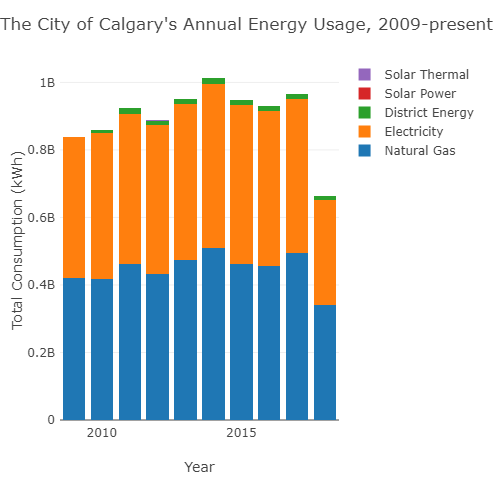

In [4]:
# 1A) making stacked bar chart of total annual consumption by different energy types
annual011 = energy002.groupby(['Year', 'Energy Description']).sum()
annual012 = annual011.unstack(1)

# annual2 = annual2.drop([2018])
years = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

trace1 = go.Bar(x = years, y = annual012['Total Consumption','Natural Gas'], name  = 'Natural Gas', 
                    marker=dict(color= colnatgas))
trace2 = go.Bar(x = years, y = annual012['Total Consumption','Electricity'], name  = 'Electricity', 
                    marker=dict(color= colelec))
trace3 = go.Bar(x = years, y = annual012['Total Consumption','District Energy'], name  = 'District Energy',  
                    marker=dict(color= coldistrict))
trace4 = go.Bar(x = years, y = annual012['Total Consumption','Solar Power'], name  = 'Solar Power',
                    marker=dict(color= colsolpower))
trace5 = go.Bar(x = years, y = annual012['Total Consumption','Solar Thermal'], name  = 'Solar Thermal', 
                    marker=dict(color= colsoltherm))

data010 = [trace1, trace2, trace3, trace4, trace5]
layout010 = go.Layout(title = 'The City of Calgary\'s Annual Energy Usage, 2009-present',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Total Consumption (kWh)'),
                    barmode = 'stack', 
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4))

fig01 = go.Figure(data = data010, layout = layout010)
py.iplot(fig01)    


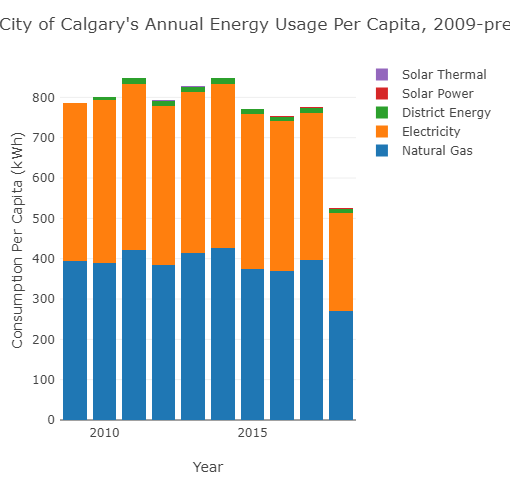

In [5]:
# 1B) Let's divide the consumption by the city's population 
# Source for YYC population data - www.municipalaffairs.alberta.ca/mc_official_populations

pop_data = {'2009': 1065455, '2010': 1071515, '2011': 1090936, '2012': 1120225, '2013': 1149552, 
            '2014': 1195194, '2015': 1230915, '2016': 1235171, '2017': 1246337, '2018': 1267344}
yycpop = pd.Series(pop_data)

# Calculate energy consumption per capita
annual020 = pd.DataFrame()
annual020['Natural Gas'] = annual012['Total Consumption','Natural Gas']/yycpop.values
annual020['District Energy'] = annual012['Total Consumption','District Energy']/yycpop.values
annual020['Electricity'] = annual012['Total Consumption','Electricity']/yycpop.values
annual020['Solar Power'] = annual012['Total Consumption','Solar Power']/yycpop.values
annual020['Solar Thermal'] = annual012['Total Consumption','Solar Thermal']/yycpop.values


# Make bar plot
trace1 = go.Bar(x = years, y = annual020['Natural Gas'], name  = 'Natural Gas')
trace2 = go.Bar(x = years, y = annual020['Electricity'], name  = 'Electricity')
trace3 = go.Bar(x = years, y = annual020['District Energy'], name  = 'District Energy') 
trace4 = go.Bar(x = years, y = annual020['Solar Power'], name  = 'Solar Power')
trace5 = go.Bar(x = years, y = annual020['Solar Thermal'], name  = 'Solar Thermal') 

data02 = [trace1, trace2, trace3, trace4, trace5]
layout02 = go.Layout( title = 'The City of Calgary\'s Annual Energy Usage Per Capita, 2009-present',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Consumption Per Capita (kWh)'),
                    barmode = 'stack',
                     width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4))

fig02 = go.Figure(data = data02, layout = layout02)
py.iplot(fig02)

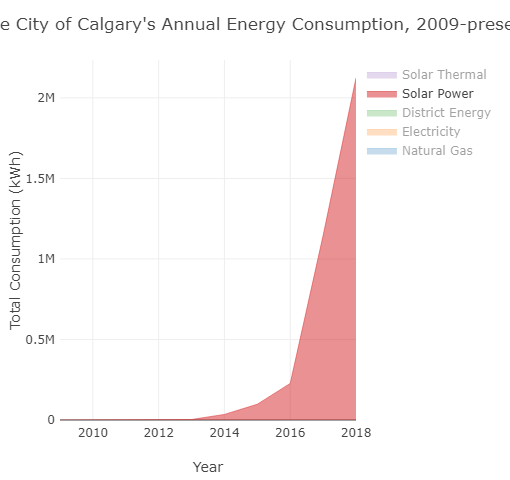

In [6]:
# 1C) Make stacked area graphs - looks better?

Natural_Gas = dict(x=years,y=annual012['Total Consumption','Natural Gas'], name='Natural Gas',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5, color= colnatgas),stackgroup='one' ,visible = 'legendonly')

Electricity = dict(x=years,y=annual012['Total Consumption','Electricity'],name='Electricity',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color= colelec),stackgroup='one' ,visible = 'legendonly')

District_Energy = dict(x=years, y=annual012['Total Consumption','District Energy'],name='District Energy',
    hoverinfo='x+y',mode='lines', line=dict(width=0.5, color=coldistrict), stackgroup='one' ,visible = 'legendonly')

Solar_Energy = dict(x=years,y=annual012['Total Consumption','Solar Power'],name='Solar Power',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color=colsolpower),stackgroup='one')

Solar_Thermal= dict(x=years,y=annual012['Total Consumption','Solar Thermal'], name='Solar Thermal',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color=colsoltherm),stackgroup='one' ,visible = 'legendonly')

data30 = [Natural_Gas, Electricity, District_Energy,Solar_Energy,Solar_Thermal]

layout30 = go.Layout(title = 'The City of Calgary\'s Annual Energy Consumption, 2009-present',
                    xaxis = dict(title = 'Year'), yaxis = dict(title = 'Total Consumption (kWh)'),
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4))

fig30 = dict(data=data30, layout = layout30)
py.iplot(fig30)

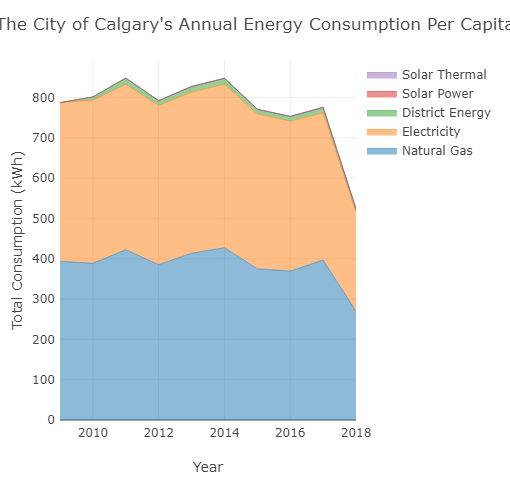

In [7]:
# 1D) Stacked area plot PER CAPITA

Natural_Gas2 = dict(x=years,y=annual020['Natural Gas'], name='Natural Gas',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5, color= colnatgas),stackgroup='one')

Electricity2 = dict(x=years,y=annual020['Electricity'],name='Electricity',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color=colelec),stackgroup='one')

District_Energy2 = dict(x=years, y=annual020['District Energy'],name='District Energy',
    hoverinfo='x+y',mode='lines', line=dict(width=0.5, color=coldistrict), stackgroup='one')

Solar_Energy2 = dict(x=years,y=annual020['Solar Power'],name='Solar Power',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color=colsolpower),stackgroup='one')

Solar_Thermal2 = dict(x=years,y=annual020['Solar Thermal'], name='Solar Thermal',hoverinfo='x+y',
    mode='lines',line=dict(width=0.5,color=colsoltherm),stackgroup='one')

data31 = [Natural_Gas2, Electricity2, District_Energy2,Solar_Energy2,Solar_Thermal2]

layout31 = go.Layout(title = 'The City of Calgary\'s Annual Energy Consumption Per Capita',
                    xaxis = dict(title = 'Year'),
                    yaxis = dict(title = 'Total Consumption (kWh)'), 
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4))


fig31 = dict(data=data31, layout = layout31)
py.iplot(fig31)

## 2. How do heat and electricity consumption change over a year?


Summary of the following plots:

2a) Violin plot to show the distribution of heating consumption averaged over the years (2009-2018), then over all the facilities

2b) The distributions were so compressed at the bottom, we separated the facilities according to their average monthly heating consumption. With the bottom cutoff of 2GWh, there were 33 high heat consuming facilities.  With the top cutoff of 1 GWh, there were 382 low heat consuming facilities.

2c and d) We made the same plots for electricity consumption, with different cutoffs for the high and low consumers.

<br>
We saw big variation between the different months for both heating and electricity, with high consumption during the winter and low consumption during the summer. For the low electricity consuming units, this monthly variation was absent, or at least it did not follow the previous patterns. This is because they're probably little electricity consuming units that work year-round.



In [8]:
# Separate heat and electricity 
# HEAT
heat030 = energy002[(energy002['Energy Description'] == 'Natural Gas') | (energy002['Energy Description'] == 'Solar Thermal') | (energy002['Energy Description'] == 'District Energy')]

# ELECTRICITY
elec030 = energy002[(energy002['Energy Description'] == 'Electricity') | (energy002['Energy Description'] == 'Solar Power')]

In [9]:
# 2A) Heat
# select columns
heatmonth100 = heat030[['FacilityName', 'Month', 'Total Consumption']]

# group values
heatmonth101 = heatmonth100.groupby(['FacilityName', 'Month']).sum()

# Move month index to columns
heatmonth101 = heatmonth101.unstack(1)

# drop NaN's and 0's
heatmonth102 = heatmonth101[pd.notnull(heatmonth101['Total Consumption'])]
heatmonth102 = heatmonth102[heatmonth102['Total Consumption'] != 0]

monthcols = [('Total Consumption', 'Jan'),('Total Consumption', 'Feb'),('Total Consumption', 'Mar'),
             ('Total Consumption', 'Apr'),('Total Consumption', 'May'),('Total Consumption', 'Jun'),
             ('Total Consumption', 'Jul'),('Total Consumption', 'Aug'),('Total Consumption', 'Sep'),
             ('Total Consumption', 'Oct'),('Total Consumption', 'Nov'),('Total Consumption', 'Dec')]
heatmonth102 = heatmonth102[monthcols]

heatmonth102 = heatmonth102[heatmonth102.sum(axis = 'columns') != 0]

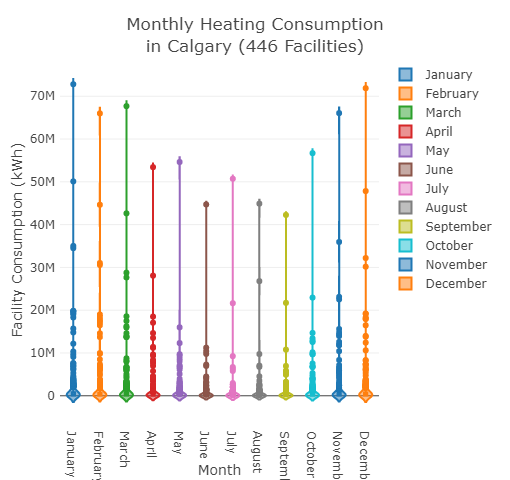

In [10]:
# make violin plots

data10 = [
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': heatmonth102['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig10 = { 'data' : data10,
        'layout': {'title' :'Monthly Heating Consumption<br>in Calgary (446 Facilities)',
                   'xaxis' : {'title' : 'Month'},'yaxis' : {'title' : 'Facility Consumption (kWh)'},
                    'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4}} }

py.iplot(fig10)

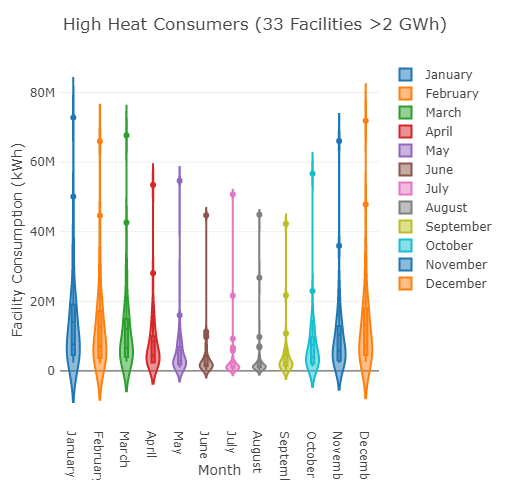

In [11]:
# 2B) Since the distributions are so bunched at the bottom, let's separate the high and low heat consumers

# mean monthly heat for all facilities 
heatmonth102['meanmonth'] = heatmonth102.apply(np.mean, axis='columns')

# HIGH heat consumers
heathigh121 = heatmonth102[heatmonth102['meanmonth'] > 2000000]
data12 = [
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': heathigh121['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig12 = { 'data' : data12,
        'layout': {'title' :'High Heat Consumers (33 Facilities >2 GWh)', 'xaxis' : {'title' : 'Month'},
                   'yaxis' : {'title' : 'Facility Consumption (kWh)'},
                'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4} }}

py.iplot(fig12)

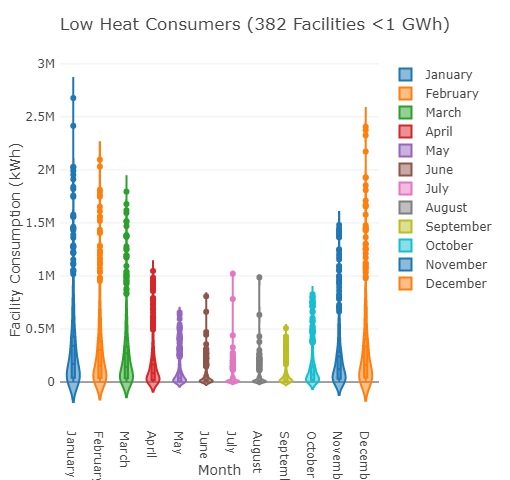

In [12]:
# LOW heat consumers
heatlow131 = heatmonth102[heatmonth102['meanmonth'] <= 1000000]
data13 = [
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': heatlow131['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig13 = { 'data' : data13,
        'layout': {'title' :'Low Heat Consumers (382 Facilities <1 GWh)','xaxis' : {'title' : 'Month'},
                   'yaxis' : {'title' : 'Facility Consumption (kWh)'},
                'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4} }}
py.iplot(fig13)

In [13]:
# 2C) do the same for electricity

# select columns
elecmonth110 = elec030[['FacilityName', 'Month', 'Total Consumption']]

# group values
elecmonth111 = elecmonth110.groupby(['FacilityName', 'Month']).sum()

# Move month index to columns
elecmonth111 = elecmonth111.unstack(1)

# drop NaN's and 0's
elecmonth112 = elecmonth111[pd.notnull(elecmonth111['Total Consumption'])]
elecmonth112 = elecmonth112[elecmonth112['Total Consumption'] != 0]

monthcols = [('Total Consumption', 'Jan'),('Total Consumption', 'Feb'),('Total Consumption', 'Mar'),
             ('Total Consumption', 'Apr'),('Total Consumption', 'May'),('Total Consumption', 'Jun'),
             ('Total Consumption', 'Jul'),('Total Consumption', 'Aug'),('Total Consumption', 'Sep'),
             ('Total Consumption', 'Oct'),('Total Consumption', 'Nov'),('Total Consumption', 'Dec')]
elecmonth112 = elecmonth112[monthcols]

elecmonth112 = elecmonth112[elecmonth112.sum(axis = 'columns') != 0]

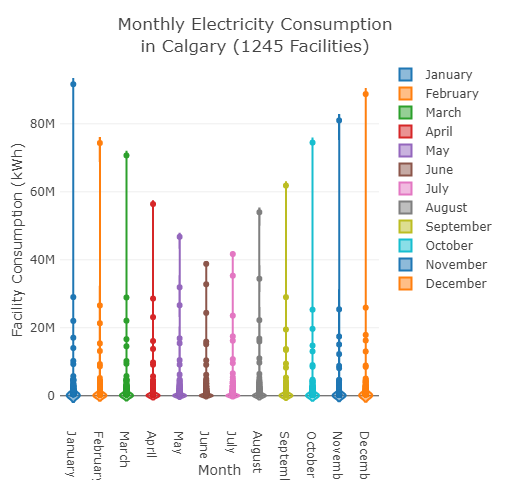

In [14]:
# violin plots

data11 = [
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': elecmonth112['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig11 = { 'data' : data11,
        'layout': {'title' :'Monthly Electricity Consumption<br>in Calgary (1245 Facilities)',
                   'xaxis' : {'title' : 'Month'},'yaxis' : {'title' : 'Facility Consumption (kWh)'},
              'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4}  } }

py.iplot(fig11)

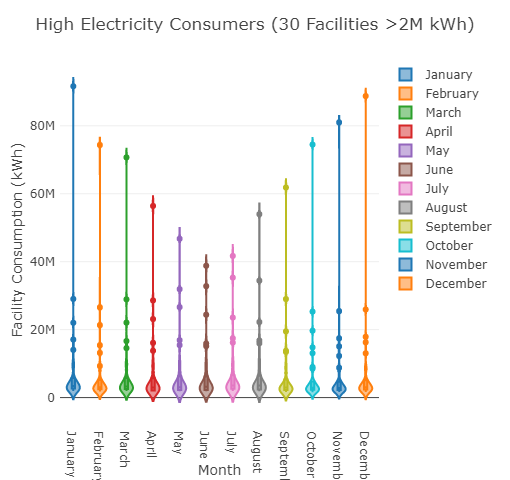

In [15]:
# 2D) separate top and bottom consumers for electricity

# mean monthly electricity for all facilities 
elecmonth112['meanmonth'] = elecmonth112.apply(np.mean, axis='columns')

# HIGH consumers
elechigh141 = elecmonth112[elecmonth112['meanmonth'] > 2000000]
data14 = [
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': elechigh141['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig14 = { 'data' : data14,
        'layout': {'title' :'High Electricity Consumers (30 Facilities >2M kWh)','xaxis' : {'title' : 'Month'},
                   'yaxis' : {'title' : 'Facility Consumption (kWh)'},
              'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4} }}

py.iplot(fig14)

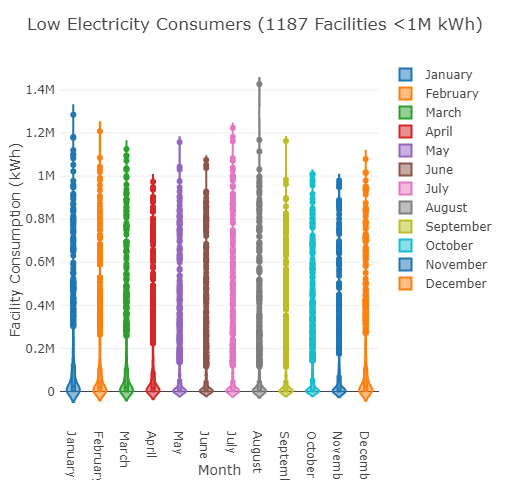

In [16]:
# LOW electricity consumers
eleclow151 = elecmonth112[elecmonth112['meanmonth'] <= 1000000]
data15 = [
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Jan'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'January'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Feb'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'February'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Mar'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'March'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Apr'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'April'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'May'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'May'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Jun'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'June'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Jul'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'July'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Aug'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'August'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Sep'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'September'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Oct'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'October'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Nov'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'November'},
    {'type' : 'violin', 'y': eleclow151['Total Consumption', 'Dec'], 'box': {'visible' : True}, 'meanline': {'visible' : True}, 'name' : 'December'}
]

fig15 = { 'data' : data15,
        'layout': {'title' :'Low Electricity Consumers (1187 Facilities <1M kWh)',
                   'xaxis' : {'title' : 'Month'},'yaxis' : {'title' : 'Facility Consumption (kWh)'},
              'width':wid, 'height':hei, 'margin':{'l':mar, 'r':mar, 'b':mar, 't':mar, 'pad':4}}}
py.iplot(fig15)

## 3. Which facilities are the big electricity and heat consumers?

From hereon, we decided to filter the data to just consumption values from September 2017 to August 2018. This allows us to look at and assess Calgary's very recent energy consumption.
<br>


Summary of the following plots:

3a) We made a scatter plot of electricity consumption vs heating consumption with the axes on log-scales. The coloring on the dots is random for aesthetic purposes only; we do more meaningful coloring later.

3b) Upon seeing that a lot of facilities were missing from the plot in 3a, we realized that the facilities that exclusively consumed heat or electricity would not be represented since log of 0 is undefined. We changed the 0's to 0.1's so we could have a look.

To look at the top consumers, we decided to use combined total consumption instead of keeping the separation between heat and energy. Otherwise, we would have generated two separate lists of top 50 or 100 consumers and the comparison between them would be complicated. Also, this allowed us to take advantage of our conversion of the heating units (GJ) to kWh so that we could combine these consumption values. 

3c) This is a bar plot of the Top 50 consuming facilities.

3d) After flipping the axes and color-coding by Business Unit, this became a much more informative plot. We grew the number of facilities shown from 50 to 100 so that the viewer can feel invited to zoom in and look at different sections as well as to get the overall view. 

3e) Finally, we added in 2009 consumption values while keeping the order of the Top 100 from 2017. This way, we can see which facilities had improved or worsened in their consumption.

<br>
Overall, we could see that the top facilities were treatment plants and street lighting. After the top 10 or so facilities, consumption values level off considerably. 

In [17]:
# prepare table with electricity/natural gas totals grouped by Business Units

energy160 = energy002[(energy002['Year'] == 2018) | ((energy002['Year'] == 2017) & (energy['Month'] == 'Sep'))|
                ((energy002['Year'] == 2017) & (energy002['Month'] == 'Oct'))|
                ((energy002['Year'] == 2017) & (energy002['Month'] == 'Nov'))|
                ((energy002['Year'] == 2017) & (energy002['Month'] == 'Dec'))]

energy161 = energy160[(energy160['Energy Description'] == 'Natural Gas') | (energy160['Energy Description'] == 'Electricity')]
energy162 = energy161.drop(['Year'], axis = 1)
energy163 = energy162.groupby(['Business Unit Desc', 'FacilityName','Energy Description']).sum()
energy164 = energy163.unstack(['Energy Description'])


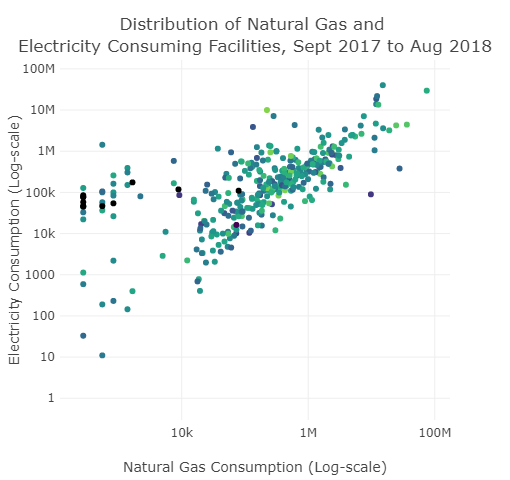

In [18]:
#3A) make scatter plot
trace16 = go.Scatter(
    x = energy164['Total Consumption', 'Natural Gas'],
    y = energy164['Total Consumption', 'Electricity'],
    mode = 'markers',
    marker = dict(color = np.random.randn(929),colorscale = 'Viridis'),
    text = list(energy164.index.values)
)
layout16 = go.Layout(title = 'Distribution of Natural Gas and <br>Electricity Consuming Facilities, Sept 2017 to Aug 2018',
    xaxis=dict(type = 'log', autorange = True, title = 'Natural Gas Consumption (Log-scale)'),
    yaxis=dict(type = 'log', autorange = True, title = 'Electricity Consumption (Log-scale)'),
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4)
)

data16 = [trace16]
fig16 = go.Figure(data16, layout16)

py.iplot(fig16)

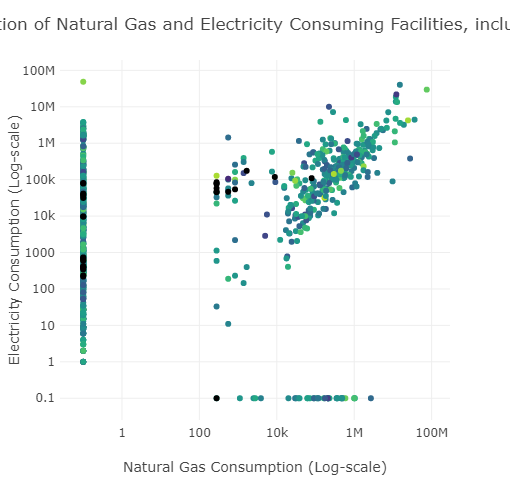

In [19]:
# 3B) A lot of dots are missing because they have 0 heat/elec and don't show up on log scale

energy164.fillna(0.1, inplace=True) # replace NaN's with 0.01's - log(0) is undefined
trace17 = go.Scatter(
    x = energy164['Total Consumption', 'Natural Gas'],
    y = energy164['Total Consumption', 'Electricity'],
    mode = 'markers',
    marker = dict(color = np.random.randn(929),colorscale = 'Viridis'),
    text = list(energy164.index.values)
)
layout17 = go.Layout(title = 'Distribution of Natural Gas and Electricity Consuming Facilities, including 0\'s',
    xaxis=dict(type = 'log', autorange = True, title = 'Natural Gas Consumption (Log-scale)'),
    yaxis=dict(type = 'log', autorange = True, title = 'Electricity Consumption (Log-scale)'), 
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4)
)
data17 = [trace17]
fig17 = go.Figure(data17, layout17)

py.iplot(fig17)

# this plot doesn't look good, let's try something else

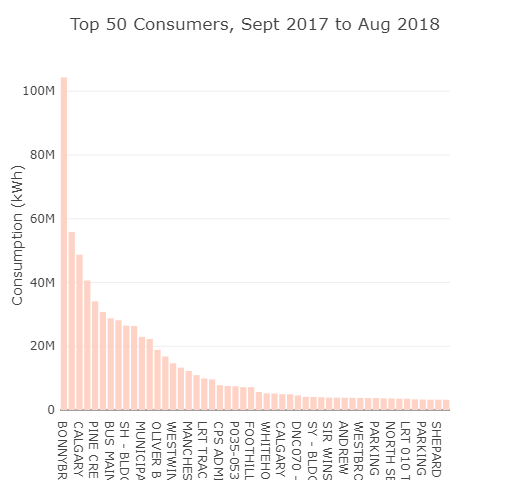

In [20]:
# 3C) looking at top 100 or 50 consumers

energy181 = energy160.drop(['Business Unit Desc', 'Year', 'Month', 'Energy Description'], axis =1)

energy182 = energy181['Total Consumption'].groupby(energy181['FacilityName']).sum() 
energy183 = energy182.sort_values(ascending=False)
energy184 = energy183[:50] # top 50 consumers - make up 70.86% of total
energy185 = energy183[:100] # top 100 consumers - make up 81% of total

data18 = [go.Bar(x = energy184.index, y = energy184.values, marker=dict(color = 'rgb(255, 210, 198)'),  name  = '')]
layout18 = go.Layout( title = 'Top 50 Consumers, Sept 2017 to Aug 2018',xaxis = dict(title = ''),yaxis = dict(title = 'Consumption (kWh)'), 
                      width= wid, height = hei, margin=go.Margin(l=mar,r=mar,b=70,t=mar, pad=4))

fig18 = go.Figure(data = data18, layout = layout18)
py.iplot(fig18)

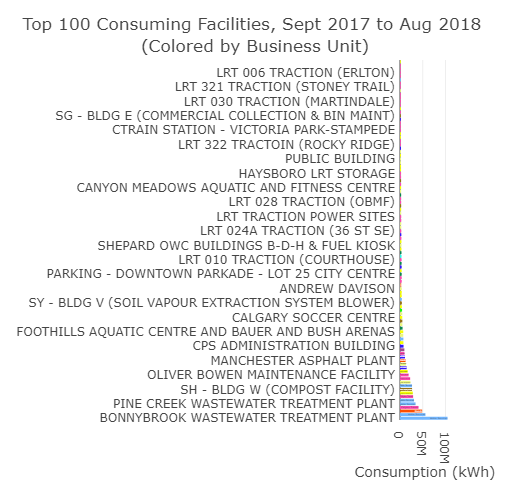

In [21]:
# 3D) looking at top 100 but colorcode by business unit

energy191 = energy185.to_frame(name = 'Total Consumption')

# Getting back the Business Unit of the top 100 consumers; I'm sure there's an easier way but I'm tired
BusUnit = []
for i in energy191.index:
    imatch = energy160.loc[energy160['FacilityName'] == i]
    BusUnit.append(imatch.iloc[0]['Business Unit Desc'])
se = pd.Series(BusUnit)
energy191['BusUnit']= se.values

colors19 = []
for j in BusUnit:
    if j == 'Water Services': colors19.append(colwatserv)
    elif j == 'Roads': colors19.append(colroads)
    elif j == 'Calgary Transit': colors19.append(coltransit)
    elif j == 'Calgary Recreation': colors19.append(colrecre)
    elif j == 'Facility Management': colors19.append(colfacman)
    elif j == 'CPS - Bureaus': colors19.append(colpolice)
    elif j == 'Waste - Recycling Services': colors19.append(colwaste)
    elif j == 'Real Estate and Dev Serv': colors19.append(colestate)
    elif j == 'Calgary Parking Auth': colors19.append(colparking)
    elif j == 'Calgary Parks': colors19.append(colparks)
    elif j == 'Water Resources':  colors19.append(colwatres)
        
data19 = [go.Bar(x = energy185.values , y =  energy185.index, 
        text = BusUnit,hoverinfo = 'text',marker=dict(color = colors19), name  = '', orientation = 'h')  ]
layout19 = go.Layout( title = 'Top 100 Consuming Facilities, Sept 2017 to Aug 2018 <br>(Colored by Business Unit)',
                    xaxis = dict(title = 'Consumption (kWh)'),yaxis = dict(title = ''), 
                    width= wid, height = hei, margin=go.Margin(l=400,r=mar,b=mar,t=mar, pad=4))

fig19 = go.Figure(data = data19, layout = layout19)
py.iplot(fig19)
        

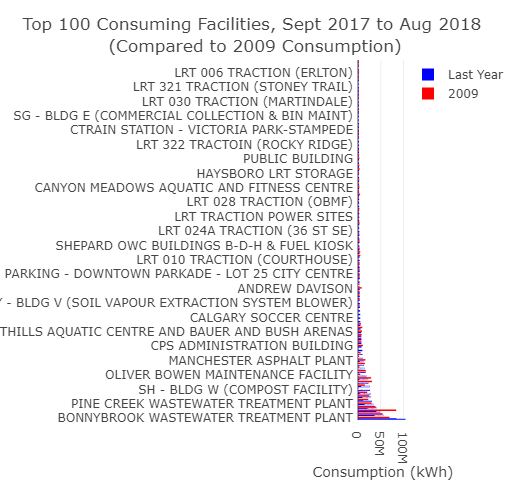

In [22]:
# 3E) Keep order of Top100, compare to 2009 values

energy320 = energy002[energy002['Year'] == 2009]
energy321 = energy320.drop(['Business Unit Desc', 'Year', 'Month', 'Energy Description'], axis =1)
energy322 = energy321['Total Consumption'].groupby(energy321['FacilityName']).sum() 
energy323 = energy322.to_frame(name = 'Total Consumption')
energy324 = energy185.copy(deep=True)

for i in energy324.index:
    if i in energy323.index:
        energy324[i] = energy323[energy323.index == i].values
    else:
        energy324[i] = 0
        
data321 = go.Bar(x = energy185.values , y =  energy185.index, text = BusUnit,
        hoverinfo = 'text',marker=dict(color = 'Blue'), name  = 'Last Year', orientation = 'h')  

data322 = go.Bar(x = energy324.values , y =  energy185.index, 
        marker=dict(color = 'Red'), name  = '2009', orientation = 'h')  

layout32 = go.Layout(barmode='group', title = 'Top 100 Consuming Facilities, Sept 2017 to Aug 2018 <br>(Compared to 2009 Consumption)',
                    xaxis = dict(title = 'Consumption (kWh)'), yaxis = dict(title = ''), 
                      width= wid, height = hei, margin=go.Margin(l=400,r=mar,b=mar,t=mar, pad=4))
data32 = [data321,data322]

fig32 = go.Figure(data = data32, layout = layout32)
py.iplot(fig32)

## 4. Can we get a more detailed look at where Calgary's energy is going?

4a) We make a sankey diagram to help us look at the proportions of energy consumption going to different energy types and business units. 

4b) The facilities were plotted on a geographic map of Calgary, color-coded by facility type and with the areas of the points proportional to energy consumption, with a minimum size limit to still be able to see the low consuming facilities. We made one map for showing heat and one for electricity. With the heat consumption map, we added an extra colorscale from blue to red to show the amount of heating by color although we do realize that this is redundant since consumption values are already represented in the areas of the points. For these maps, we toggled all the categories off to invite the viewer to add on the different facility types and build up the map as they wish. 

<br>

These were very interesting ways of visualizing energy consumption on a more detailed level.

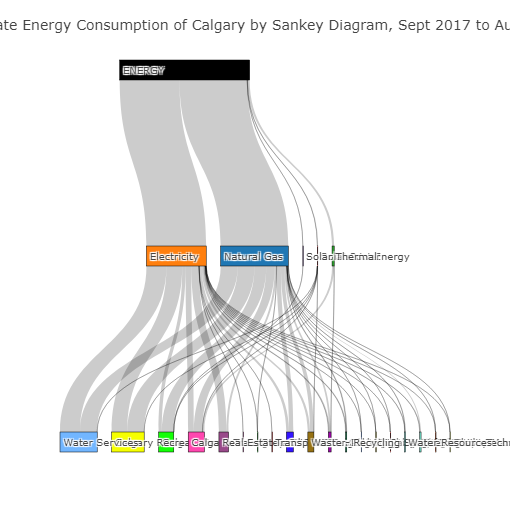

In [23]:
#4A) Sankey diagram
sandata201 = energy160.drop(['Year', 'Month'], axis = 1)

nodeColors = pd.Series({'ENERGY': 'rgb(0,0,0)', 'District Energy': coldistrict, 'Electricity': colelec,
        'Natural Gas': colnatgas, 'Solar Power': colsolpower, 'Solar Thermal': colsoltherm,
        'CPS - Bureaus': colpolice, 'Calgary Building Services': colbuild, 'Calgary Comm Standards': colcommunity,
        'Calgary Fire Department': colfire, 'Calgary Housing': colhousing, 'Calgary Neighbourhoods': colneigh,
        'Calgary Parking Auth': colparking, 'Calgary Parks':colparks, 'Calgary Recreation':colrecre,
        'Calgary Transit':coltransit, 'Facility Management':colfacman, 'Green Line':colgreen,
        'Information Technology': colIT, 'Real Estate and Dev Serv':colestate, 'Roads':colroads,
        'Transportation Planning':coltransp, 'Waste - Recycling Services':colwaste,
        'Water Resources':colwatres, 'Water Services':colwatserv})

linksource = []
linktarget = []
linkvalue = []

# first layer of sankey
sandata202 = sandata201['Total Consumption'].groupby(sandata201['Energy Description']).sum()
for i in range(1,6):
    linksource.append(0)
    linktarget.append(i)
    linkvalue.append(sandata202[i-1])

# second layer of sankey
sandata203 = sandata201.groupby(['Energy Description', 'Business Unit Desc']).sum()    
sandata204 = sandata203.unstack(['Energy Description'])
numtypes  = sandata204.shape[0]
numbus = sandata204.shape[1]
for i in range(numtypes):
    for j in range(numbus):
        if not np.isnan(sandata204.iloc[i,j]):
            linksource.append(j+1)
            linktarget.append(i+6)
            linkvalue.append(sandata204.iloc[i,j])

# make diagram
data20 = dict(type='sankey',orientation = 'v',
    node = dict(pad = 15,thickness = 20,line = dict(color = "black", width = 0.5), 
    label = list(nodeColors.index), color = list(nodeColors.values)),
     link = dict(source = linksource, target = linktarget, value = linkvalue))

layout20 =  dict(title = "Corporate Energy Consumption of Calgary by Sankey Diagram, Sept 2017 to Aug 2018",
    font = dict(size = 10),   width= wid, height = 512, margin=go.Margin(l=mar,r=mar,b=mar,t=mar, pad=4))

fig20 = dict(data=[data20], layout=layout20)
py.iplot(fig20)

### Geomapping

For this, we had to get the coordinates of each address. I prepared and wrote a csv file ('latest3.csv'), then got the coordinates of each address from GoogleMaps and put them in Excel, saving it as 'latest6.csv'.I apologize for using Excel, but getting the coordinates took a long time and Excel lets you quickly see that the numbers were inputted properly. In Ms. Mota's presentation on October 15, she touched on the inconvenience of command-line interfacing for a tedious process such as this. Also, if you try to implement a python script to get coordinates for addresses from GoogleMaps, it times out after a short amount of time which made for a frustrating experience. 

While I was using Excel, I took the opportunity to group the facilities better for the upcoming maps - it mostly follows the Business Units, but a bit different. For example, I picked out community recycling depots that were scattered around many Business Units and I made Street Lighting its own category to treat it separately its Business Unit (Roads). 

NOTE: I 'located' Street Lighting to the bottom left corner of the Calgary map because there is no specified address associated. 

In [24]:
# We need the facility addresses from the original data table
latest = energy[(energy['Year'] == 2018) | ((energy['Year'] == 2017) & (energy['Month'] == 'Sep'))|
                ((energy['Year'] == 2017) & (energy['Month'] == 'Oct'))|
                ((energy['Year'] == 2017) & (energy['Month'] == 'Nov'))|
                ((energy['Year'] == 2017) & (energy['Month'] == 'Dec'))]
                                
latest1 = latest.drop(['Business Unit Desc', 'FacilityName','Site ID', 'Year', 'Month', 'Unit'], axis = 1)
latest2 = latest1.groupby(['FacilityAddress', 'Energy Description']).sum()
latest3 = latest2.unstack(1)

latest3.to_csv('latest3.csv')

In [25]:
latest6 = pd.read_csv("latest6.csv") 
latest6.fillna(0, inplace=True) # replace NaN's with 0's

# get rid of rows with 0 natural gas or district energy
hmask = latest6.index[(latest6['Natural Gas']!= 0) | (latest6['District Energy']!= 0)  | (latest6['Solar Thermal']!= 0)]
heatmap = latest6.loc[hmask]

hgroup1 = heatmap[heatmap['Group'] == 'Municipal Complex']
hgroup2 = heatmap[heatmap['Group'] == 'Facility Management']
hgroup3 = heatmap[heatmap['Group'] == 'Calgary Parking Auth']
hgroup4 = heatmap[heatmap['Group'] == 'Calgary Transit']
hgroup5 = heatmap[heatmap['Group'] == 'Green Line']
hgroup6 = heatmap[heatmap['Group'] == 'Calgary Police Services']
hgroup7 = heatmap[heatmap['Group'] == 'Calgary Fire Department']
hgroup8 = heatmap[heatmap['Group'] ==  'Calgary Recreation']
hgroup9 = heatmap[heatmap['Group'] == 'Real Estate and Dev Serv']
hgroup10 = heatmap[heatmap['Group'] == 'Inactive']
hgroup11 = heatmap[heatmap['Group'] == 'Depot']
hgroup12 = heatmap[heatmap['Group'] == 'Water Services']
hgroup13 = heatmap[heatmap['Group'] == 'Water Resources']
hgroup14 = heatmap[heatmap['Group'] == 'Waste - Recycling Services']     
hgroup15 = heatmap[heatmap['Group'] == 'Roads']
hgroup16 = heatmap[heatmap['Group'] == 'Calgary Street Lighting']
hgroup17 = heatmap[heatmap['Group'] == 'Calgary Parks']


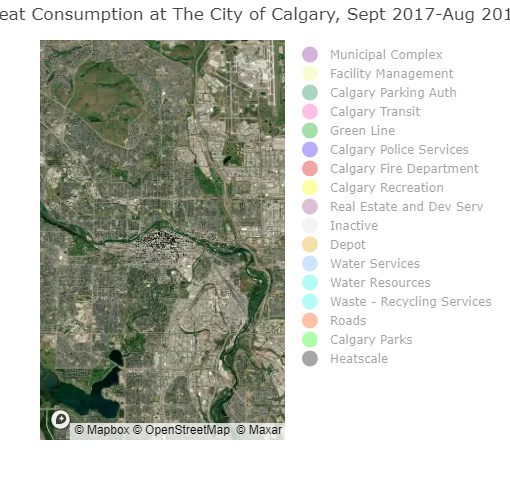

In [26]:
# heatmap
token = 'pk.eyJ1IjoibGVvMyIsImEiOiJjam4zdW1sOGwwMWZ1M2xvaXZleXg4aWNjIn0.VO14nz8z54Z_Ed5sIrK5tA'
hsizereference = 100

# colorscale for heatmap
scalefor18=[[0.0, 'rgb(49,54,149)'], [0.1111111111111111, 'rgb(69,117,180)'], [0.2222222222222222, 'rgb(116,173,209)'], 
            [0.3333333333333333, 'rgb(171,217,233)'], [0.4444444444444444, 'rgb(224,243,248)'], 
            [0.5555555555555556, 'rgb(254,224,144)'], [0.6666666666666666, 'rgb(253,174,97)'], 
            [0.7777777777777778, 'rgb(244,109,67)'], [0.8888888888888888, 'rgb(215,48,39)'], [1.0, 'rgb(165,0,38)']]


datahgroup1 = [go.Scattermapbox(name ='Municipal Complex', lat=hgroup1.Latitude, lon=hgroup1.Longitude, mode='markers',
               marker=dict(size=hgroup1['District Energy'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colmuni),text = hgroup1.FacilityName, visible = 'legendonly')]
datahgroup2 = [go.Scattermapbox(name ='Facility Management', lat=hgroup2.Latitude, lon=hgroup2.Longitude,mode='markers',
               marker=dict(size=hgroup2['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4, color=colfacman),text = hgroup2.FacilityName, visible = 'legendonly')]
datahgroup3 = [go.Scattermapbox(name ='Calgary Parking Auth', lat=hgroup3.Latitude, lon=hgroup3.Longitude, mode='markers',
               marker=dict(size=hgroup3['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4, color=colparking),text = hgroup3.FacilityName, visible = 'legendonly')]
datahgroup4 = [go.Scattermapbox(name ='Calgary Transit', lat=hgroup4.Latitude, lon=hgroup4.Longitude, mode='markers', 
               marker=dict(size=hgroup4['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4, color=coltransit),text = hgroup4.FacilityName, visible = 'legendonly')]
datahgroup5 = [go.Scattermapbox(name ='Green Line', lat=hgroup5.Latitude, lon=hgroup5.Longitude, mode='markers',
               marker=dict(size=hgroup5['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colgreen),text = hgroup5.FacilityName, visible = 'legendonly')]
datahgroup6 = [go.Scattermapbox(name ='Calgary Police Services', lat=hgroup6.Latitude, lon=hgroup6.Longitude, mode='markers',
               marker=dict(size=hgroup6['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colpolice),text = hgroup6.FacilityName, visible = 'legendonly')]
datahgroup7 = [go.Scattermapbox(name ='Calgary Fire Department', lat=hgroup7.Latitude, lon=hgroup7.Longitude,mode='markers', 
               marker=dict(size=hgroup7['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colfire),text = hgroup7.FacilityName, visible = 'legendonly')]
datahgroup8 = [go.Scattermapbox(name ='Calgary Recreation', lat=hgroup8.Latitude, lon=hgroup8.Longitude, mode='markers',
               marker=dict(size=hgroup8['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colrecre),text = hgroup8.FacilityName, visible = 'legendonly')]
datahgroup9 = [go.Scattermapbox(name ='Real Estate and Dev Serv', lat=hgroup9.Latitude, lon=hgroup9.Longitude,mode='markers',
               marker=dict(size=hgroup9['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4, color=colestate),text = hgroup9.FacilityName, visible = 'legendonly')]
datahgroup10 = [go.Scattermapbox(name ='Inactive', lat=hgroup10.Latitude, lon=hgroup10.Longitude,mode='markers',
               marker=dict(size=hgroup10['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colinactive) ,text = hgroup10.FacilityName, visible = 'legendonly')]
datahgroup11 = [go.Scattermapbox(name ='Depot', lat=hgroup11.Latitude, lon=hgroup11.Longitude,mode='markers',
               marker=dict(size=hgroup11['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=coldepot) ,text = hgroup11.FacilityName, visible = 'legendonly')]
datahgroup12 = [go.Scattermapbox(name ='Water Services', lat=hgroup12.Latitude, lon=hgroup12.Longitude,mode='markers',
               marker=dict(size=hgroup12['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colwatserv) ,text = hgroup12.FacilityName, visible = 'legendonly')]
datahgroup13 = [go.Scattermapbox(name ='Water Resources', lat=hgroup13.Latitude, lon=hgroup13.Longitude,mode='markers',
               marker=dict(size=hgroup13['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colwatres) ,text = hgroup13.FacilityName, visible = 'legendonly')]
datahgroup14 = [go.Scattermapbox(name ='Waste - Recycling Services', lat=hgroup14.Latitude, lon=hgroup14.Longitude,mode='markers',
               marker=dict(size=hgroup14['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colwatres) ,text = hgroup14.FacilityName, visible = 'legendonly')]
datahgroup15 = [go.Scattermapbox(name ='Roads', lat=hgroup15.Latitude, lon=hgroup15.Longitude,mode='markers',
               marker=dict(size=hgroup15['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colroads) ,text = hgroup15.FacilityName, visible = 'legendonly')]
datahgroup16 = [go.Scattermapbox(name ='Calgary Street Lighting', lat=hgroup16.Latitude, lon=hgroup16.Longitude,mode='markers',
               marker=dict(size=hgroup16['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=collights) ,text = hgroup16.FacilityName, visible = 'legendonly')]
datahgroup17 = [go.Scattermapbox(name ='Calgary Parks', lat=hgroup17.Latitude, lon=hgroup17.Longitude,mode='markers',
               marker=dict(size=hgroup17['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color=colparks) ,text = hgroup17.FacilityName, visible = 'legendonly')]
datahgroup18 = [go.Scattermapbox(name ='Heatscale', lat=heatmap.Latitude, lon=heatmap.Longitude,mode='markers',
               marker=dict(size=heatmap['Natural Gas'], sizemode='area', sizeref=hsizereference,
                           sizemin=4,color = np.log(heatmap['Natural Gas']),colorscale=scalefor18) ,text = heatmap.FacilityName, visible = 'legendonly')]

allhgroups = datahgroup1 + datahgroup2 + datahgroup3 + datahgroup4 + datahgroup5 + datahgroup6 + datahgroup7 + datahgroup8 + datahgroup9 + datahgroup10 + datahgroup11 + datahgroup12 + datahgroup13 + datahgroup14 + datahgroup15 + datahgroup16 + datahgroup17 + datahgroup18


layoutA = go.Layout(title='Heat Consumption at The City of Calgary, Sept 2017-Aug 2018',
    width= 720, height = 480, margin=go.Margin(l=40,r=40,b=40,t=40, pad=4),hovermode='closest', 
    mapbox=dict(accesstoken=token,bearing=0,
        center=dict(  lat=51.0486,lon=-114.0708), # Calgary coordinates
        pitch=10, zoom=10,style ='satellite'),)

figA = dict(data= allhgroups, layout=layoutA)
py.iplot(figA)
    

In [27]:
# get rid of rows with 0 electricity
mask = latest6.index[latest6['Electricity']!= 0 | (latest6['Solar Power']!= 0)]
emap = latest6.loc[mask]

egroup1 = emap[emap['Group'] == 'Municipal Complex']
egroup2 = emap[emap['Group'] == 'Facility Management']
egroup3 = emap[emap['Group'] == 'Calgary Parking Auth']
egroup4 = emap[emap['Group'] == 'Calgary Transit']
egroup5 = emap[emap['Group'] == 'Green Line']
egroup6 = emap[emap['Group'] == 'Calgary Police Services']
egroup7 = emap[emap['Group'] == 'Calgary Fire Department']
egroup8 = emap[emap['Group'] ==  'Calgary Recreation']
egroup9 = emap[emap['Group'] == 'Real Estate and Dev Serv']
egroup10 = emap[emap['Group'] == 'Inactive']
egroup11 = emap[emap['Group'] == 'Depot']
egroup12 = emap[emap['Group'] == 'Water Services']
egroup13 = emap[emap['Group'] == 'Water Resources']
egroup14 = emap[emap['Group'] == 'Waste - Recycling Services']     
egroup15 = emap[emap['Group'] == 'Roads']
egroup16 = emap[emap['Group'] == 'Calgary Street Lighting']
egroup17 = emap[emap['Group'] == 'Calgary Parks']

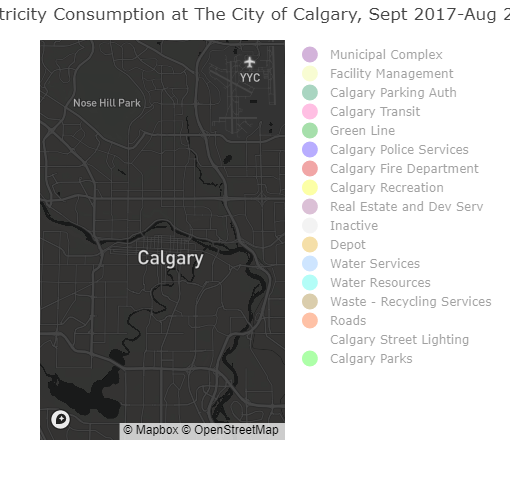

In [28]:
# electricity map
token = 'pk.eyJ1IjoibGVvMyIsImEiOiJjam4zdW1sOGwwMWZ1M2xvaXZleXg4aWNjIn0.VO14nz8z54Z_Ed5sIrK5tA'

esizereference = 5000

dataegroup1 = [go.Scattermapbox(name ='Municipal Complex', lat=egroup1.Latitude, lon=egroup1.Longitude, mode='markers',
               marker=dict(size=egroup1.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colmuni),text = egroup1.FacilityName, visible = 'legendonly')]
dataegroup2 = [go.Scattermapbox(name ='Facility Management', lat=egroup2.Latitude, lon=egroup2.Longitude,mode='markers',
               marker=dict(size=egroup2.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4, color=colfacman),text = egroup2.FacilityName, visible = 'legendonly')]
dataegroup3 = [go.Scattermapbox(name ='Calgary Parking Auth', lat=egroup3.Latitude, lon=egroup3.Longitude, mode='markers',
               marker=dict(size=egroup3.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4, color=colparking),text = egroup3.FacilityName, visible = 'legendonly')]
dataegroup4 = [go.Scattermapbox(name ='Calgary Transit', lat=egroup4.Latitude, lon=egroup4.Longitude, mode='markers', 
               marker=dict(size=egroup4.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4, color=coltransit),text = egroup4.FacilityName, visible = 'legendonly')]
dataegroup5 = [go.Scattermapbox(name ='Green Line', lat=egroup5.Latitude, lon=egroup5.Longitude, mode='markers',
               marker=dict(size=egroup5.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colgreen),text = egroup5.FacilityName, visible = 'legendonly')]
dataegroup6 = [go.Scattermapbox(name ='Calgary Police Services', lat=egroup6.Latitude, lon=egroup6.Longitude, mode='markers',
               marker=dict(size=egroup6.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colpolice),text = egroup6.FacilityName, visible = 'legendonly')]
dataegroup7 = [go.Scattermapbox(name ='Calgary Fire Department', lat=egroup7.Latitude, lon=egroup7.Longitude,mode='markers', 
               marker=dict(size=egroup7.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colfire),text = egroup7.FacilityName, visible = 'legendonly')]
dataegroup8 = [go.Scattermapbox(name ='Calgary Recreation', lat=egroup8.Latitude, lon=egroup8.Longitude, mode='markers',
               marker=dict(size=egroup8.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colrecre),text = egroup8.FacilityName, visible = 'legendonly')]
dataegroup9 = [go.Scattermapbox(name ='Real Estate and Dev Serv', lat=egroup9.Latitude, lon=egroup9.Longitude,mode='markers',
               marker=dict(size=egroup9.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4, color=colestate),text = egroup9.FacilityName, visible = 'legendonly')]
dataegroup10 = [ go.Scattermapbox(name ='Inactive', lat=egroup10.Latitude, lon=egroup10.Longitude,mode='markers',
               marker=dict(size=egroup10.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colinactive) ,text = egroup10.FacilityName, visible = 'legendonly')]
dataegroup11 = [go.Scattermapbox(name ='Depot', lat=egroup11.Latitude, lon=egroup11.Longitude,mode='markers',
               marker=dict(size=egroup11.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=coldepot) ,text = egroup11.FacilityName, visible = 'legendonly')]
dataegroup12 = [go.Scattermapbox(name ='Water Services', lat=egroup12.Latitude, lon=egroup12.Longitude,mode='markers',
               marker=dict(size=egroup12.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colwatserv) ,text = egroup12.FacilityName, visible = 'legendonly')]
dataegroup13 = [go.Scattermapbox(name ='Water Resources', lat=egroup13.Latitude, lon=egroup13.Longitude,mode='markers',
               marker=dict(size=egroup13.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colwatres) ,text = egroup13.FacilityName, visible = 'legendonly')]
dataegroup14 = [go.Scattermapbox(name ='Waste - Recycling Services', lat=egroup14.Latitude, lon=egroup14.Longitude,mode='markers',
               marker=dict(size=egroup14.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colwaste) ,text = egroup14.FacilityName, visible = 'legendonly')]
dataegroup15 = [go.Scattermapbox(name ='Roads', lat=egroup15.Latitude, lon=egroup15.Longitude,mode='markers',
               marker=dict(size=egroup15.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colroads) ,text = egroup15.FacilityName, visible = 'legendonly')]
dataegroup16 = [go.Scattermapbox(name ='Calgary Street Lighting', lat=egroup16.Latitude, lon=egroup16.Longitude,mode='markers',
               marker=dict(size=egroup16.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=collights) ,text = egroup16.FacilityName, visible = 'legendonly')]
dataegroup17 = [go.Scattermapbox(name ='Calgary Parks', lat=egroup17.Latitude, lon=egroup17.Longitude,mode='markers',
               marker=dict(size=egroup17.Electricity, sizemode='area', sizeref=esizereference,
                           sizemin=4,color=colparks) ,text = egroup17.FacilityName, visible = 'legendonly')]


allegroups = dataegroup1 + dataegroup2 + dataegroup3 + dataegroup4 + dataegroup5 + dataegroup6 + dataegroup7 + dataegroup8 + dataegroup9 + dataegroup10 + dataegroup11 + dataegroup12 + dataegroup13 + dataegroup14 + dataegroup15 + dataegroup16 + dataegroup17


layoutB = go.Layout(title='Electricity Consumption at The City of Calgary, Sept 2017-Aug 2018',
    width= 720, height = 480, margin=go.Margin(l=40,r=40,b=40,t=40, pad=4),hovermode='closest', 
    mapbox=dict(accesstoken=token,bearing=0,
        center=dict(  lat=51.0486,lon=-114.0708), # Calgary coordinates
        pitch=10, zoom=10,style ='dark'),)

figB = dict(data= allegroups, layout=layoutB)
py.iplot(figB)
    

## CONCLUDING NOTES

Overall, we learned a great deal about energy consumption at The City of Calgary's facilities. We saw that energy consumption has not been reduced greatly over the last nine years, and the contributions of the new cleaner energies have been very little so far. There was nice variation in consumption between months, with high usage in the winter and low usage in the summer. Finally, we were able to look at recent energy consumption of the 1320 facilities to evaluate the high consumers and geographic locations. 

We are aware of one limitation with the dataset in that wind power has not been included, and we know that the LRT trains have been running exclusively from that power source (Dodge and Kinney, 2015).

The next steps from this project may include combining this with comparable data for other cities, should they become available, for us to get a better sense of how Calgary is doing. As well, combining this with comparable data for residential and private properties would allow us to visualize the entirety of Calgary's energy consumption. 

## REFERENCES

Alberta Municipal Affairs, 2018. Municipal Census and Population Lists [Online] The Government of Alberta. 
Available at: www.municipalaffairs.alberta.ca/mc_official_populations (Accessed: 14 October 2018)

Dodge, D. and Kinney, D. (2015) 115. Calgary’s wind-powered LRT an incredibly successful system: Nenshi, Green Energy Futures. 
Available at: www.greenenergyfutures.ca/episode/c-train-success-nenshi-calgary (Accessed: 19 October 2018)

Dodge, D. and Thompson, D. (2016). 'How Calgary Is Looking Ahead And Embracing Clean Energy', HuffPost Canada. 
Available at: www.huffingtonpost.ca/david-dodge/calgarys-renewable-energy_b_9790518.html  (Accessed: 30 September 2018)

Rieger, S. (2015). 'Calgary's Transition to LED Lights Can Be Seen From Space (Before-And-After)', HuffPost Canada. 
Available at: www.huffingtonpost.ca/2015/12/02/calgary-from-space_n_8692092.html (Accessed: 30 September 2018)

The City of Calgary, (2018a). Calgary's Climate Program [Online] The City of Calgary Home Page. 
Available at: www.calgary.ca/UEP/ESM/Pages/Energy-Savings/Climate-Change.aspx (Accessed: 30 September 2018)

The City of Calgary, (2018b). Corporate Energy Consumption [Online] Open Calgary. 
Available at: data.calgary.ca/Environment/Corporate-Energy-Consumption/crbp-innf (Accessed: 30 September 2018)

The City of Calgary, (2018c). Energy Efficient LED Lighting [Online] The City of Calgary. 
Available at: www.calgary.ca/Transportation/Roads/Pages/Traffic/Traffic-signals-and-streetlights/Energy-Efficient-LED-Lighting-Project.aspx (Accessed: 30 September 2018)

The City of Calgary, (2018d). Open Calgary Terms of Use [Online] The City of Calgary. 
Available at: data.calgary.ca/stories/s/Open-Calgary-Terms-of-Use/u45n-7awa (Accessed: 30 September 2018)


### REFERENCES for Python and libraries used:
McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, pp. 51-56. *(Pandas)*

Oliphant, T.E. (2006). A guide to Numpy. USA: Trelgol Publishing. *(Numpy)*

Plotly Technologies Inc, (2015). Collaborative data science [Online] 
Available at: plot.ly (Accessed: 30 September 2018) *(Plotly)*

Python Software Foundation, (2018). The Python Language Reference - Python 3.7.1rc documentation [Online] 
Available at: docs.python.org/3.6 (Accessed: 30 September 2018) *(Python 3)*


# Contributions

N. Sun created the plots for Guiding Questions 1 and 2. 

L. Nguyen created the plots for Guiding Questions 3 and 4.

Both partners edited each other's work, cleaning up the coding and revising the written portions.